<a href="https://colab.research.google.com/github/Aayushi-Sharma24/Online_Retail_Customer_Segmentation_Unsupervised/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

##Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#populate the dataframe
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Projects -Draft/unsupervised /Online Retail.xlsx")

###Let's Explore the data

In [ ]:
#First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#check shape
df.shape

(541909, 8)



*   Rows = 5,41,909
*   Columns = 8



In [ ]:
#check column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#check statistical aspects of dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products bought: ", df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique())
print('Number of countries: ', df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Number of countries:  38


##Let's check for Missing values in the dataset

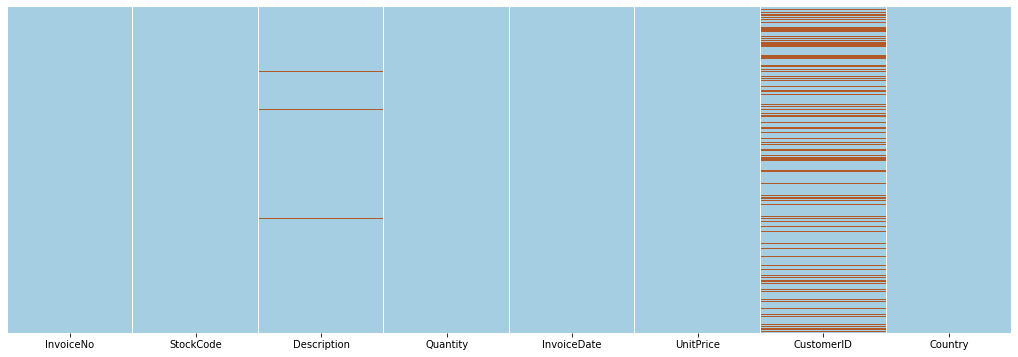

In [ ]:
# check for Null values
plt.rcParams['figure.figsize'] = (18, 6)
sns.heatmap(df.isnull(), cbar=False,yticklabels=False,cmap='Paired')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

**CustomerId** and **Description** features have null values

##Let's check for Duplicated data

In [ ]:
# check for duplicate rows
df.duplicated().sum()

5268

There are 5268 duplicated rows in our dataset. We will drop these duplicated rows

In [4]:
# Dropping Duplicate Rows
df=df.drop_duplicates()

###Let's check the missing values again after dropping duplicated rows

In [ ]:
#check null values
df.isnull().sum().sort_values(ascending=False)

CustomerID     135037
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

##Exploratory Data Analysis

###Top 10 countries based on orders

Text(0.5, 1.0, 'top 10 countries based on orders')

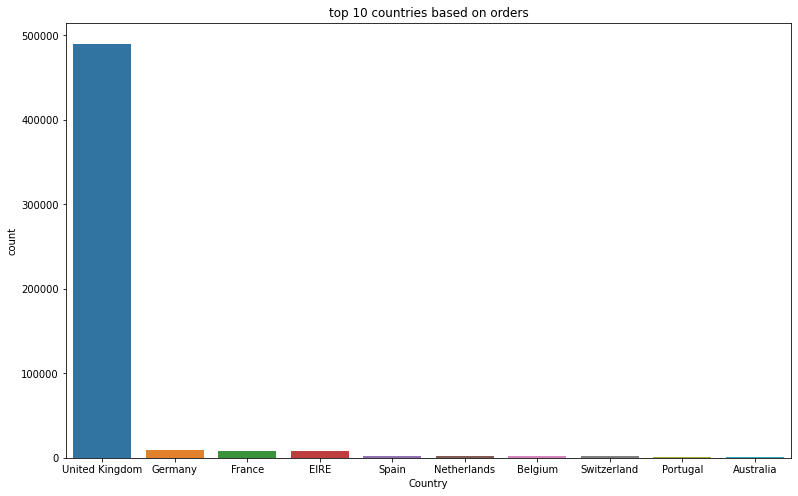

In [ ]:
#Plotting data using countplot
plt.figure(figsize=(13,8))
sns.countplot(x='Country', data=df, order=df.Country.value_counts().iloc[:10].index)
plt.title("top 10 countries based on orders")

####Maximum orders are recieved from United Kingdom

###Bottom 5 Countries based on orders

Text(0.5, 1.0, 'Least 5 countries based on orders')

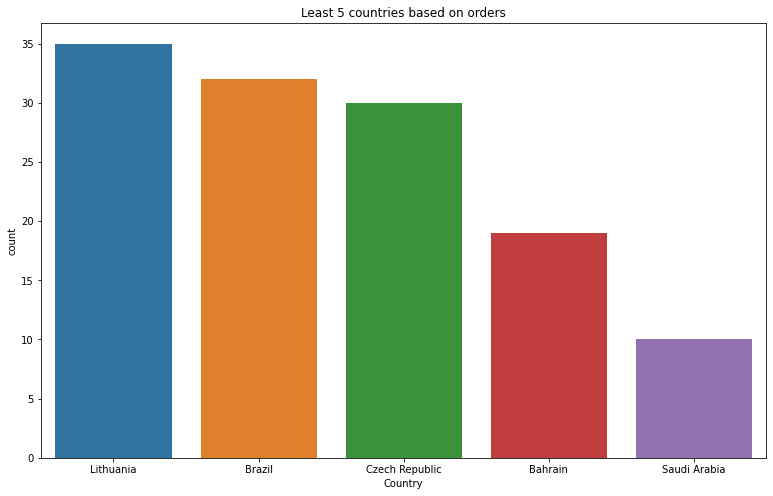

In [ ]:
#Plotting data using countplot
plt.figure(figsize=(13,8))
sns.countplot(x='Country', data=df, order=df.Country.value_counts().iloc[33:].index)
plt.title("Least 5 countries based on orders")

Least number of Orders are from Saudi Arabia

###Let's find out Top 5 Product name

In [ ]:
#Extracting description data in a dataframe
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2357
1,REGENCY CAKESTAND 3 TIER,2189
2,JUMBO BAG RED RETROSPOT,2156
3,PARTY BUNTING,1720
4,LUNCH BAG RED RETROSPOT,1625


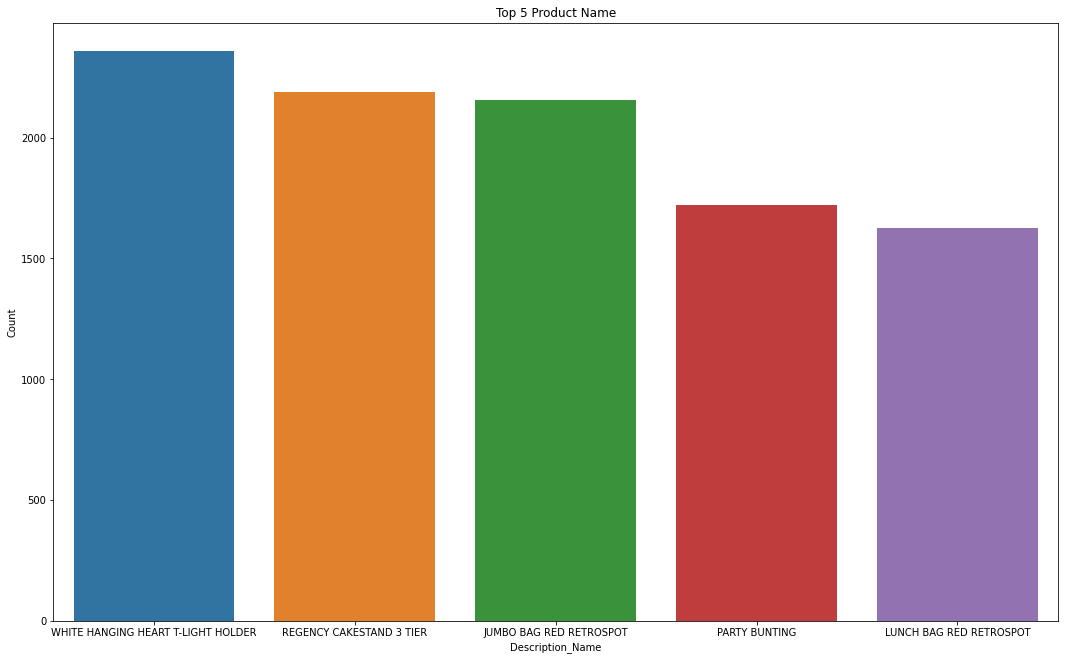

In [ ]:
#Plotting data using barplot
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

###Let's Explore Stock Name

In [ ]:
#Extracting StockCode data in a dataframe
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2301
1,22423,2192
2,85099B,2156
3,47566,1720
4,20725,1626


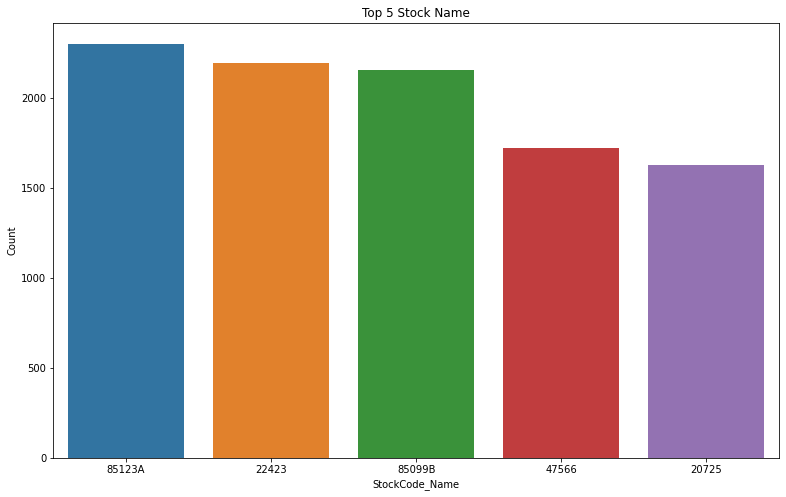

In [ ]:
#Plotting data using barplot
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

###Overview of Quantity column

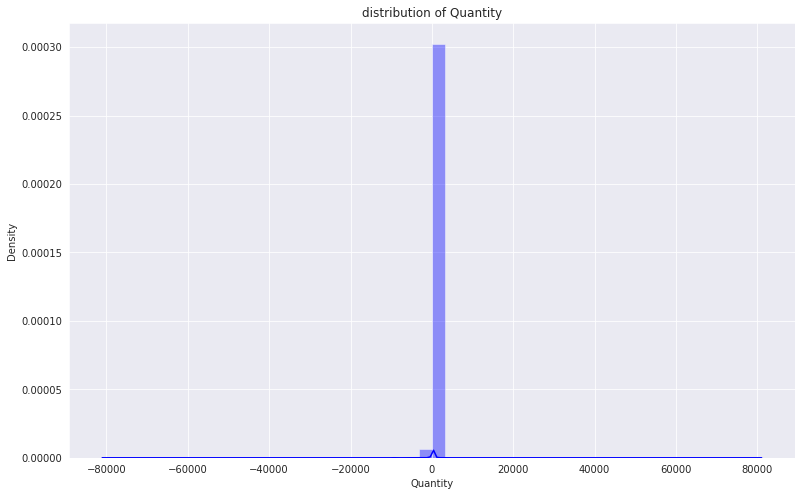

In [29]:
#distribution of Quantity
plt.figure(figsize=(13,8))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

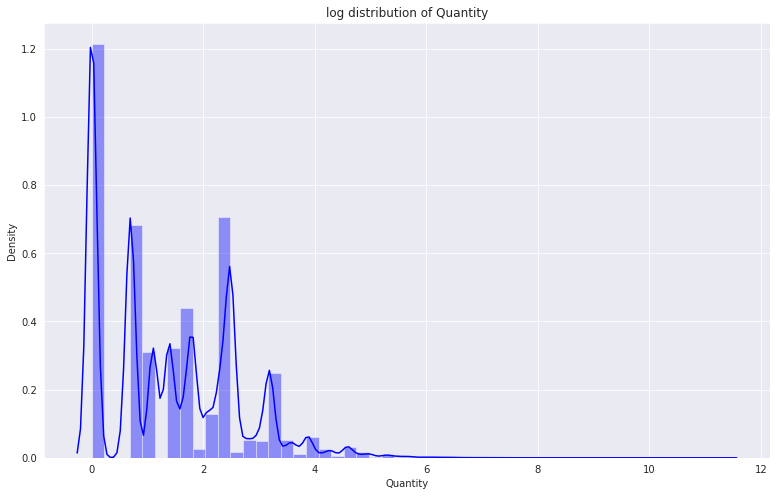

In [30]:
#log distribution of Quantity
plt.figure(figsize=(13,8))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

###Overview of Unit Price

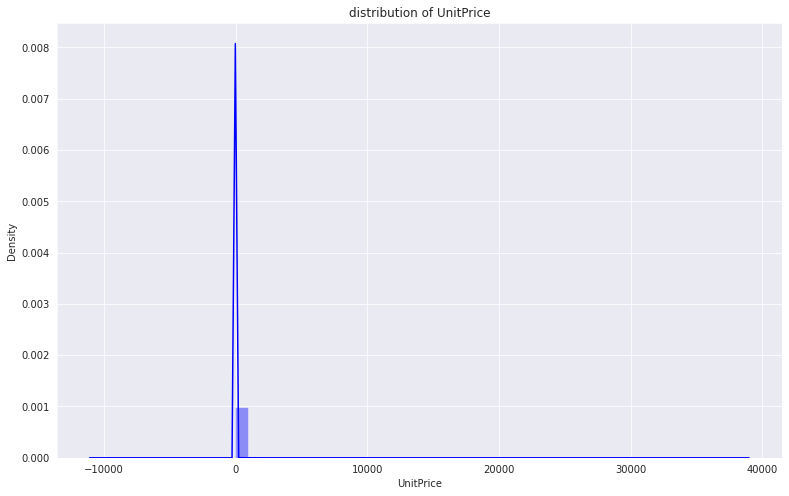

In [31]:
#distribution of UnitPrice
plt.figure(figsize=(13,8))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

### What's the average number of unqiue items per order and per customer?

In [26]:
#extracting unique items per order 
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

,Number of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [9]:
#statistical analysis
groupby_invoice.describe()

,Number of Items per Order
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [13]:
#extracting unique items per customer 
groupby_ID = pd.DataFrame(df.groupby('CustomerID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17


In [14]:
#statistical analysis
groupby_ID.describe()

,Number of Items per Customer
count,4372.000000
mean,61.211116
std,85.425119
min,1.000000
25%,15.000000
50%,35.000000
75%,77.000000
max,1794.000000


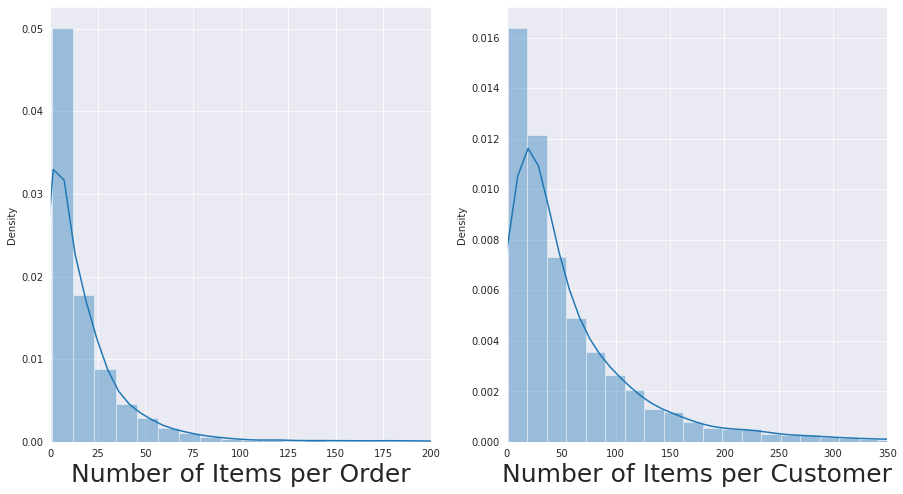

In [27]:
#Visualize the distribution of both
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 8)
plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

We have skewed left distributions for both plots. The average number of items per order is 20.5 and the average number of items per customer is 60

###How many orders were cancelled?

In [24]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
print("There were", len(cancelled_orders), "cancelled orders.")

#Calculate the percentage of cancellations by dividing the cancelled orders by the total orders
total_orders = df['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9251 cancelled orders.
Percentage of orders cancelled: 35.72% 
